In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # to scale data
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.linear_model import LogisticRegression
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [4]:
## Problem 3

In [5]:
df=pd.read_csv('heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
import pandas_profiling
prof = df.profile_report()
prof.to_file(output_file = "profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
features=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
x = df[features] # features
y = df.target # target value

In [9]:
# split into training and testing sets
from sklearn.preprocessing import StandardScaler # to scale data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(x),y,test_size=0.25,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
predicted = model.predict(x_test)

In [12]:
from sklearn import metrics
accuracy = metrics.accuracy_score(predicted,y_test)
missclassification = 1 - accuracy
precision = metrics.precision_score(predicted, y_test)


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted, y_test)
print(cm)
# 0,0 = true positive
# 0,1 = false positive
# 1,0 = false negative
# 1,1 = true negative

[[24  4]
 [ 9 39]]


In [14]:
accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("Accuracy: ", accuracy)
missclassification = 1 - accuracy
print("Missclassification: ", missclassification)
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print("Sensitivity: ", sensitivity)
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print("Specificity: ", specificity)
posPredictive = cm[0,0]/(cm[0,0]+cm[0,1])
print("Positive predicted value: ", posPredictive)
negPredictive = cm[1,1]/(cm[1,1]+cm[1,0])
print("Negative predicted value: ", negPredictive)
posLikely = sensitivity / (1-specificity)
print("Positive likelihood ratio: ", posLikely)
negLikely = (1-sensitivity) / specificity
print("Negative likelihood ratio: ", negLikely)

Accuracy:  0.8289473684210527
Missclassification:  0.17105263157894735
Sensitivity:  0.7272727272727273
Specificity:  0.9069767441860465
Positive predicted value:  0.8571428571428571
Negative predicted value:  0.8125
Positive likelihood ratio:  7.818181818181814
Negative likelihood ratio:  0.3006993006993007


In [15]:
## Problem 4

In [16]:
df=pd.read_csv('MYOPIA.csv')

In [17]:
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [18]:
features=['SPHEQ']
x = df[features] # features
y = df.MYOPIC # target value

In [19]:
# split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(x),y,test_size=0.25,random_state=0)

In [20]:
# logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
print(model.coef_, model.intercept_) # logistic regression coefficients

[[-2.18693359]] [-2.90712949]


In [22]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

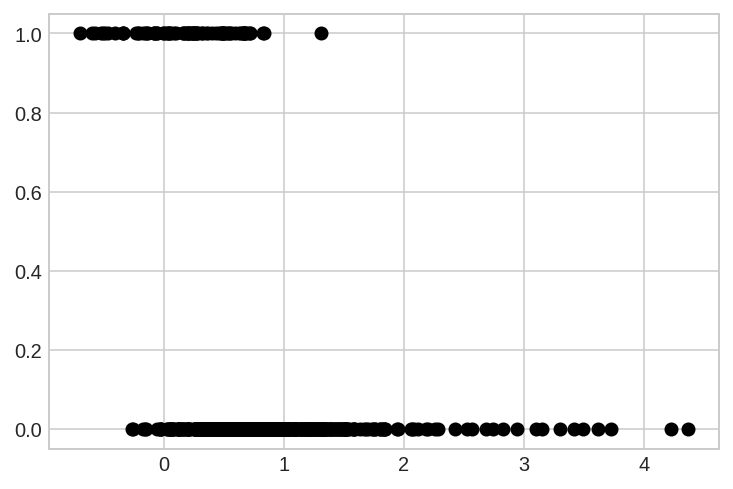

In [23]:
plt.plot(x, y, 'o', color='black');

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


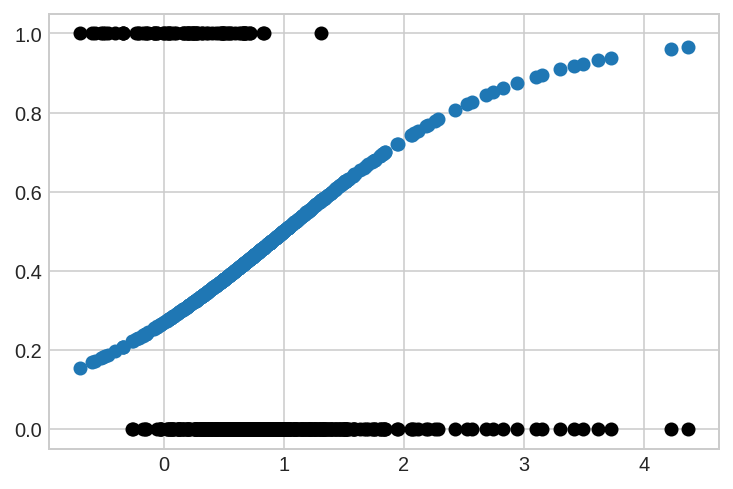

In [26]:
# Maximum likelihood estimates
# https://stats.stackexchange.com/questions/66199/maximum-likelihood-curve-model-fitting-in-python
# answer by Nate
def sigmoid(params):
    k = params[0]
    x0 = params[1]
    sd = params[2]

    yPred = 1 / (1+ np.exp(-k*(x-x0)))

    # Calculate negative log likelihood
    LL = -np.sum( stats.binom.logpmf(y,yPred,sd ) )
    return(LL)
results = minimize(sigmoid, [1,1,1], method='L-BFGS-B')
estParms = results.x
yOut = yPred = 1 / (1+ np.exp(-estParms[0]*(x-estParms[1])))

plt.plot(x, y, 'o', color='black');
plt.plot(x, yOut, 'o')
plt.show()

In [27]:
## Probem 5

In [28]:
df=pd.read_csv('icu.csv')

In [29]:
df.head()

,ID,STA,AGE,SEX,RACE,SER,CAN,CRN,INF,CPR,...,HRA,PRE,TYP,FRA,PO2,PH,PCO,BIC,CRE,LOC
0,552,0,16,0,1,1,0,0,0,0,...,140,0,1,1,0,0,0,0,0,0
1,102,0,16,1,1,0,0,0,0,0,...,111,0,1,0,0,0,0,0,0,0
2,837,0,17,1,3,0,0,0,0,0,...,140,0,1,0,0,0,0,0,0,0
3,863,0,17,0,3,1,0,0,0,0,...,78,0,1,0,0,0,0,0,0,0
4,829,0,17,0,1,1,0,0,0,0,...,78,0,1,1,0,0,0,0,0,0


In [30]:
features=['AGE']
x = df[features] # features
y = df.STA # target value

In [31]:
# split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(x),y,test_size=0.25,random_state=0)

In [32]:
# logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
print(model.coef_, model.intercept_) # logistic regression coefficients

[[0.63780118]] [-1.84522193]


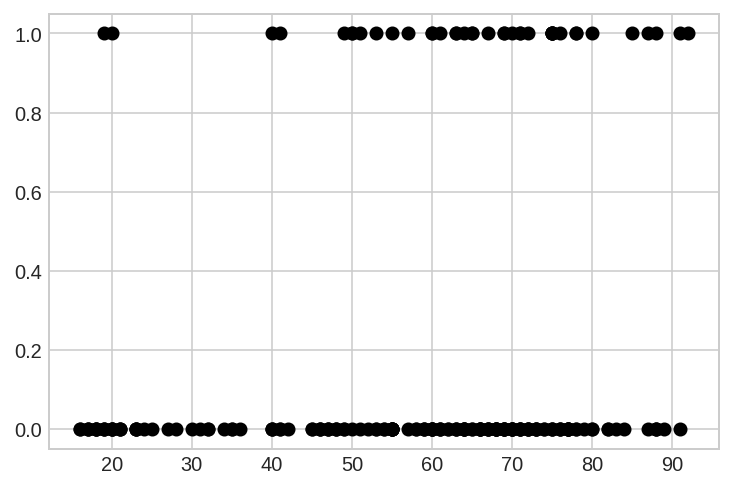

In [34]:
plt.plot(x, y, 'o', color='black');

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


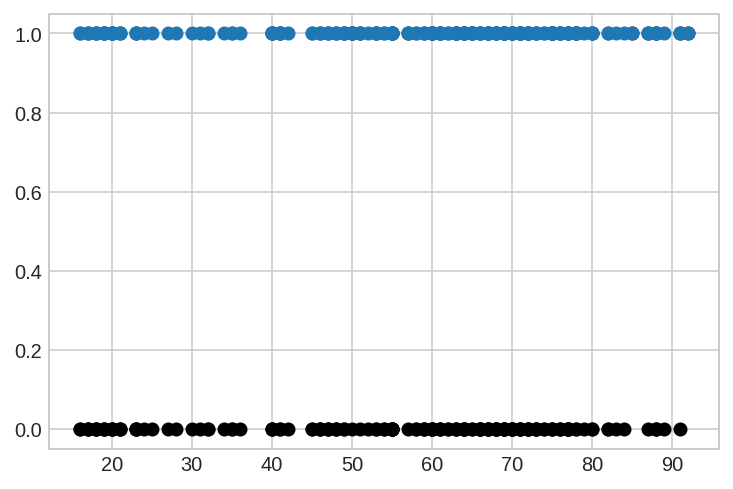

In [42]:
# Maximum likelihood estimates
# https://stats.stackexchange.com/questions/66199/maximum-likelihood-curve-model-fitting-in-python
# answer by Nate
results = minimize(sigmoid, [1,1,1], method='L-BFGS-B')
estParms = results.x
yOut = yPred = 1 / (1+ np.exp(-estParms[0]*(x-estParms[1])))

plt.plot(x, y, 'o', color='black');
plt.plot(x, yOut, 'o')
plt.show()